In [140]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [141]:
# import data

In [142]:
df_te = pd.read_csv("data/Test_set_values.csv")

In [143]:
df_tr_ind = pd.read_csv("data/Training_set_values.csv")

In [144]:
df_tr_dep = pd.read_csv("data/Training_set_labels.csv")

In [145]:
# Shows all columns in dataframe

pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [146]:
#look at each dataframe

In [147]:
df_te.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.00,2013-02-04,Dmdd,1996,DMDD,35.29,-4.06,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.00,2013-02-04,Government Of Tanzania,1569,DWE,36.66,-3.31,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.00,2013-02-01,NaN,1567,NaN,34.77,-5.00,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.00,2013-01-22,Finn Water,267,FINN WATER,38.06,-9.42,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.00,2013-03-27,Bruder,1260,BRUDER,35.01,-10.95,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [148]:
df_tr_ind.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.00,2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [149]:
df_tr_dep.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [150]:
df_tr_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [151]:
df_tr_dep['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [152]:
df_tr_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [153]:
df_tr_ind.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [154]:
#merge the two train dataframes- independent variable with dependent variable

In [155]:
df_tr = pd.merge(df_tr_ind,df_tr_dep,on='id')
df_tr

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.00,2011-03-14,Roman,1390,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.00,2013-03-06,Grumeti,1399,GRUMETI,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.00,2013-02-25,Lottery Club,686,World vision,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.00,2013-01-28,Unicef,263,UNICEF,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.00,2011-07-13,Action In A,0,Artisan,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.00,2013-05-03,Germany Republi,1210,CES,37.17,-3.25,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.00,2011-05-07,Cefa-njombe,1212,Cefa,35.25,-9.07,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.00,2011-04-11,NaN,0,NaN,34.02,-8.75,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.00,2011-03-08,Malec,0,Musa,35.86,-6.38,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [156]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [157]:
#Exploring duplicate columns/ dropping

In [158]:
df_tr['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [159]:
#dropped 'recorded_by' because all values were "GeoData Consultants LTD"

In [160]:
df_tr = df_tr.drop(["recorded_by"], axis = 1)

In [161]:
#payment vs payment_type

In [162]:
df_tr['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [163]:
df_tr['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [164]:
#dropped the payment_type column because it was identical to payment

In [165]:
df_tr = df_tr.drop(["payment_type"], axis = 1)

In [166]:
#quantity vs quantity_group

In [167]:
df_tr['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [168]:
df_tr['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [169]:
#dropped the quantity_group column because it was identical to quantity

In [170]:
df_tr = df_tr.drop(["quantity_group"], axis = 1)

In [171]:
#waterpoint_type vs waterpoint_type_group

In [172]:
df_tr['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [173]:
df_tr['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [174]:
#dropped the waterpoint_type_group column because it was a less detailed version of waterpoint_type

In [175]:
df_tr = df_tr.drop(["waterpoint_type_group"], axis = 1)

In [176]:
#source vs source_type

In [177]:
df_tr['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [178]:
df_tr['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [179]:
#dropping source because it is very similar to source_type but has extra categories which are aggregated in "source_type"

In [180]:
df_tr = df_tr.drop(["source"], axis = 1)

In [181]:
#dropping scheme_name because more than half the values are null

In [182]:
df_tr = df_tr.drop(["scheme_name"], axis = 1)

In [183]:
#extraction_type vs extraction_type_group vs extraction_type_class

In [184]:
df_tr['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [185]:
df_tr['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [186]:
df_tr['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [187]:
#dropping extraction_type and extraction_type group because they are very similar to extraction_type_class but but have extra categories which are aggregated in extraction_type_class

In [188]:
df_tr = df_tr.drop(["extraction_type"], axis = 1)

In [189]:
df_tr = df_tr.drop(["extraction_type_group"], axis = 1)

In [190]:
#region vs region_code

In [191]:
df_tr['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [192]:
df_tr['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [193]:
#region_code is the coded verison of region but had classification errors so we dropped it and re-classified region

In [194]:
df_tr = df_tr.drop(["region_code"], axis = 1)

In [195]:
#num_private, mainly values of zero so we dropped it

In [196]:
df_tr['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [197]:
df_tr = df_tr.drop(["num_private"], axis = 1)

In [198]:
#convert status_group to int

In [199]:
label_encoder = preprocessing.LabelEncoder()

In [200]:
df_tr['status_group']= label_encoder.fit_transform(df_tr['status_group'])

In [201]:
df_tr['status_group'].unique()

array([0, 2, 1])

In [202]:
#convert date to int

In [203]:
df_tr['date_recorded']

0        2011-03-14
1        2013-03-06
2        2013-02-25
3        2013-01-28
4        2011-07-13
            ...    
59395    2013-05-03
59396    2011-05-07
59397    2011-04-11
59398    2011-03-08
59399    2011-03-23
Name: date_recorded, Length: 59400, dtype: object

In [204]:
df_tr['date_recorded']= df_tr['date_recorded'].apply(lambda x : x.replace('-',''))

In [205]:
df_tr['date_recorded']

0        20110314
1        20130306
2        20130225
3        20130128
4        20110713
           ...   
59395    20130503
59396    20110507
59397    20110411
59398    20110308
59399    20110323
Name: date_recorded, Length: 59400, dtype: object

In [206]:
df_tr['date_recorded'] = df_tr['date_recorded'].astype("int64")

In [207]:
#convert payment to integer

In [208]:
df_tr['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [209]:
df_tr['payment']= label_encoder.fit_transform(df_tr['payment'])

In [210]:
df_tr['payment'].unique()

array([2, 0, 4, 6, 5, 1, 3])

In [211]:
df_tr['payment'].value_counts()

0    25348
4     8985
3     8300
6     8157
5     3914
2     3642
1     1054
Name: payment, dtype: int64

In [212]:
#convert region to int

In [213]:
df_tr['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [214]:
df_tr['region']= label_encoder.fit_transform(df_tr['region'])

In [215]:
df_tr['region'].unique()

array([ 3,  9,  8, 12,  4, 20, 17, 19, 14, 16,  6, 15, 13,  5,  7,  2,  0,
       10, 18, 11,  1])

In [216]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  int64  
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  int32  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 15  po

In [217]:
df_tr['wpt_name']= label_encoder.fit_transform(df_tr['wpt_name'])

In [218]:
df_tr['wpt_name'].unique()

array([37399, 37195, 14572, ..., 24074, 29693, 18700])

In [219]:
df_tr['basin']= label_encoder.fit_transform(df_tr['basin'])

In [220]:
df_tr['basin'].unique()

array([1, 4, 5, 7, 0, 3, 8, 6, 2])

In [221]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  int64  
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  int32  
 9   basin                  59400 non-null  int32  
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  int32  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 15  po

In [222]:
df_tr.head(30)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type,status_group
0,69572,6000.00,20110314,Roman,1390,Roman,34.94,-9.86,37399,1,Mnyusi B,3,5,Ludewa,Mundindi,109,True,VWC,False,1999,gravity,vwc,user-group,2,soft,good,enough,spring,groundwater,communal standpipe,0
1,8776,0.00,20130306,Grumeti,1399,GRUMETI,34.70,-2.15,37195,4,Nyamara,9,2,Serengeti,Natta,280,NaN,Other,True,2010,gravity,wug,user-group,0,soft,good,insufficient,rainwater harvesting,surface,communal standpipe,0
2,34310,25.00,20130225,Lottery Club,686,World vision,37.46,-3.82,14572,5,Majengo,8,4,Simanjiro,Ngorika,250,True,VWC,True,2009,gravity,vwc,user-group,4,soft,good,enough,dam,surface,communal standpipe multiple,0
3,67743,0.00,20130128,Unicef,263,UNICEF,38.49,-11.16,37285,7,Mahakamani,12,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986,submersible,vwc,user-group,0,soft,good,dry,borehole,groundwater,communal standpipe multiple,2
4,19728,0.00,20110713,Action In A,0,Artisan,31.13,-1.83,35529,4,Kyanyamisa,4,1,Karagwe,Nyakasimbi,0,True,NaN,True,0,gravity,other,other,0,soft,good,seasonal,rainwater harvesting,surface,communal standpipe,0
5,9944,20.00,20110313,Mkinga Distric Coun,0,DWE,39.17,-4.77,36137,5,Moa/Mwereme,20,8,Mkinga,Moa,1,True,VWC,True,2009,submersible,vwc,user-group,4,salty,salty,enough,other,unknown,communal standpipe multiple,0
6,19816,0.00,20121001,Dwsp,0,DWSP,33.36,-3.77,20672,0,Ishinabulandi,17,3,Shinyanga Rural,Samuye,0,True,VWC,True,0,handpump,vwc,user-group,0,soft,good,enough,borehole,groundwater,hand pump,2
7,54551,0.00,20121009,Rwssp,0,DWE,32.62,-4.23,36483,3,Nyawishi Center,17,3,Kahama,Chambo,0,True,NaN,True,0,handpump,wug,user-group,6,milky,milky,enough,shallow well,groundwater,hand pump,2
8,53934,0.00,20121103,Wateraid,0,Water Aid,32.71,-5.15,21731,3,Imalauduki,19,6,Tabora Urban,Itetemia,0,True,VWC,True,0,handpump,vwc,user-group,0,salty,salty,seasonal,borehole,groundwater,hand pump,2
9,46144,0.00,20110803,Isingiro Ho,0,Artisan,30.63,-1.26,25772,4,Mkonomre,4,1,Karagwe,Kaisho,0,True,NaN,True,0,handpump,vwc,user-group,0,soft,good,enough,shallow well,groundwater,hand pump,0


In [223]:
df_tr['lga']= label_encoder.fit_transform(df_tr['lga'])

In [224]:
df_tr['lga'].unique()

array([ 51, 103, 108,  87,  26,  68, 104,  25, 115,  69,  86,  58, 106,
        64, 113,  91, 121,   5, 101,  31,  73,  47,  96,  11,   3,  53,
         0,  46,  42,  34,  30,  55, 109,  57, 100,  74,  15,  63,   7,
        80,  52,  65,  23,  35,  59,  28,   8,  44,   9,  71,  40,  82,
       102,  24,  81,  14,  98,  17,  66,  67, 111, 117, 120,  16,  84,
        12,   6,  21,  76,  83,  10,  41,  50, 123,  62, 107,  20, 118,
       119,  60,  54,  56,  19,  36,   2,  13,  79,  77,  89,  27,  75,
        29, 110,  88,  94,  92,   4,  61, 122, 114,  72, 116,  39,  78,
        37,  49,  43, 124,  99,  45,  70, 105,  90,  18,  97,  95,  48,
        85,  38,  32,  22,  33,   1, 112,  93])

In [225]:
df_tr['ward'] = label_encoder.fit_transform(df_tr['ward'])

In [226]:
df_tr['ward'].unique()

array([1426, 1576, 1624, ...,  180, 1715,  708])

In [227]:
df_tr['construction_year'] = label_encoder.fit_transform(df_tr['construction_year'])

In [228]:
df_tr['management'] = label_encoder.fit_transform(df_tr['management'])

In [229]:
df_tr['management_group'] = label_encoder.fit_transform(df_tr['management_group'])

In [230]:
df_tr['payment'] = label_encoder.fit_transform(df_tr['payment'])

In [231]:
df_tr['water_quality'] = label_encoder.fit_transform(df_tr['water_quality'])

In [232]:
df_tr['quality_group'] = label_encoder.fit_transform(df_tr['quality_group'])

In [233]:
df_tr['quantity'] = label_encoder.fit_transform(df_tr['quantity'])

In [234]:
df_tr['source_class'] = label_encoder.fit_transform(df_tr['source_class'])

In [235]:
df_tr['source_type'] = label_encoder.fit_transform(df_tr['source_type'])

In [236]:
df_tr['extraction_type_class'] = label_encoder.fit_transform(df_tr['extraction_type_class'])

In [237]:
df_tr['waterpoint_type'] = label_encoder.fit_transform(df_tr['waterpoint_type'])

In [238]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  int64  
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  int32  
 9   basin                  59400 non-null  int32  
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  int32  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  int32  
 14  ward                   59400 non-null  int32  
 15  po

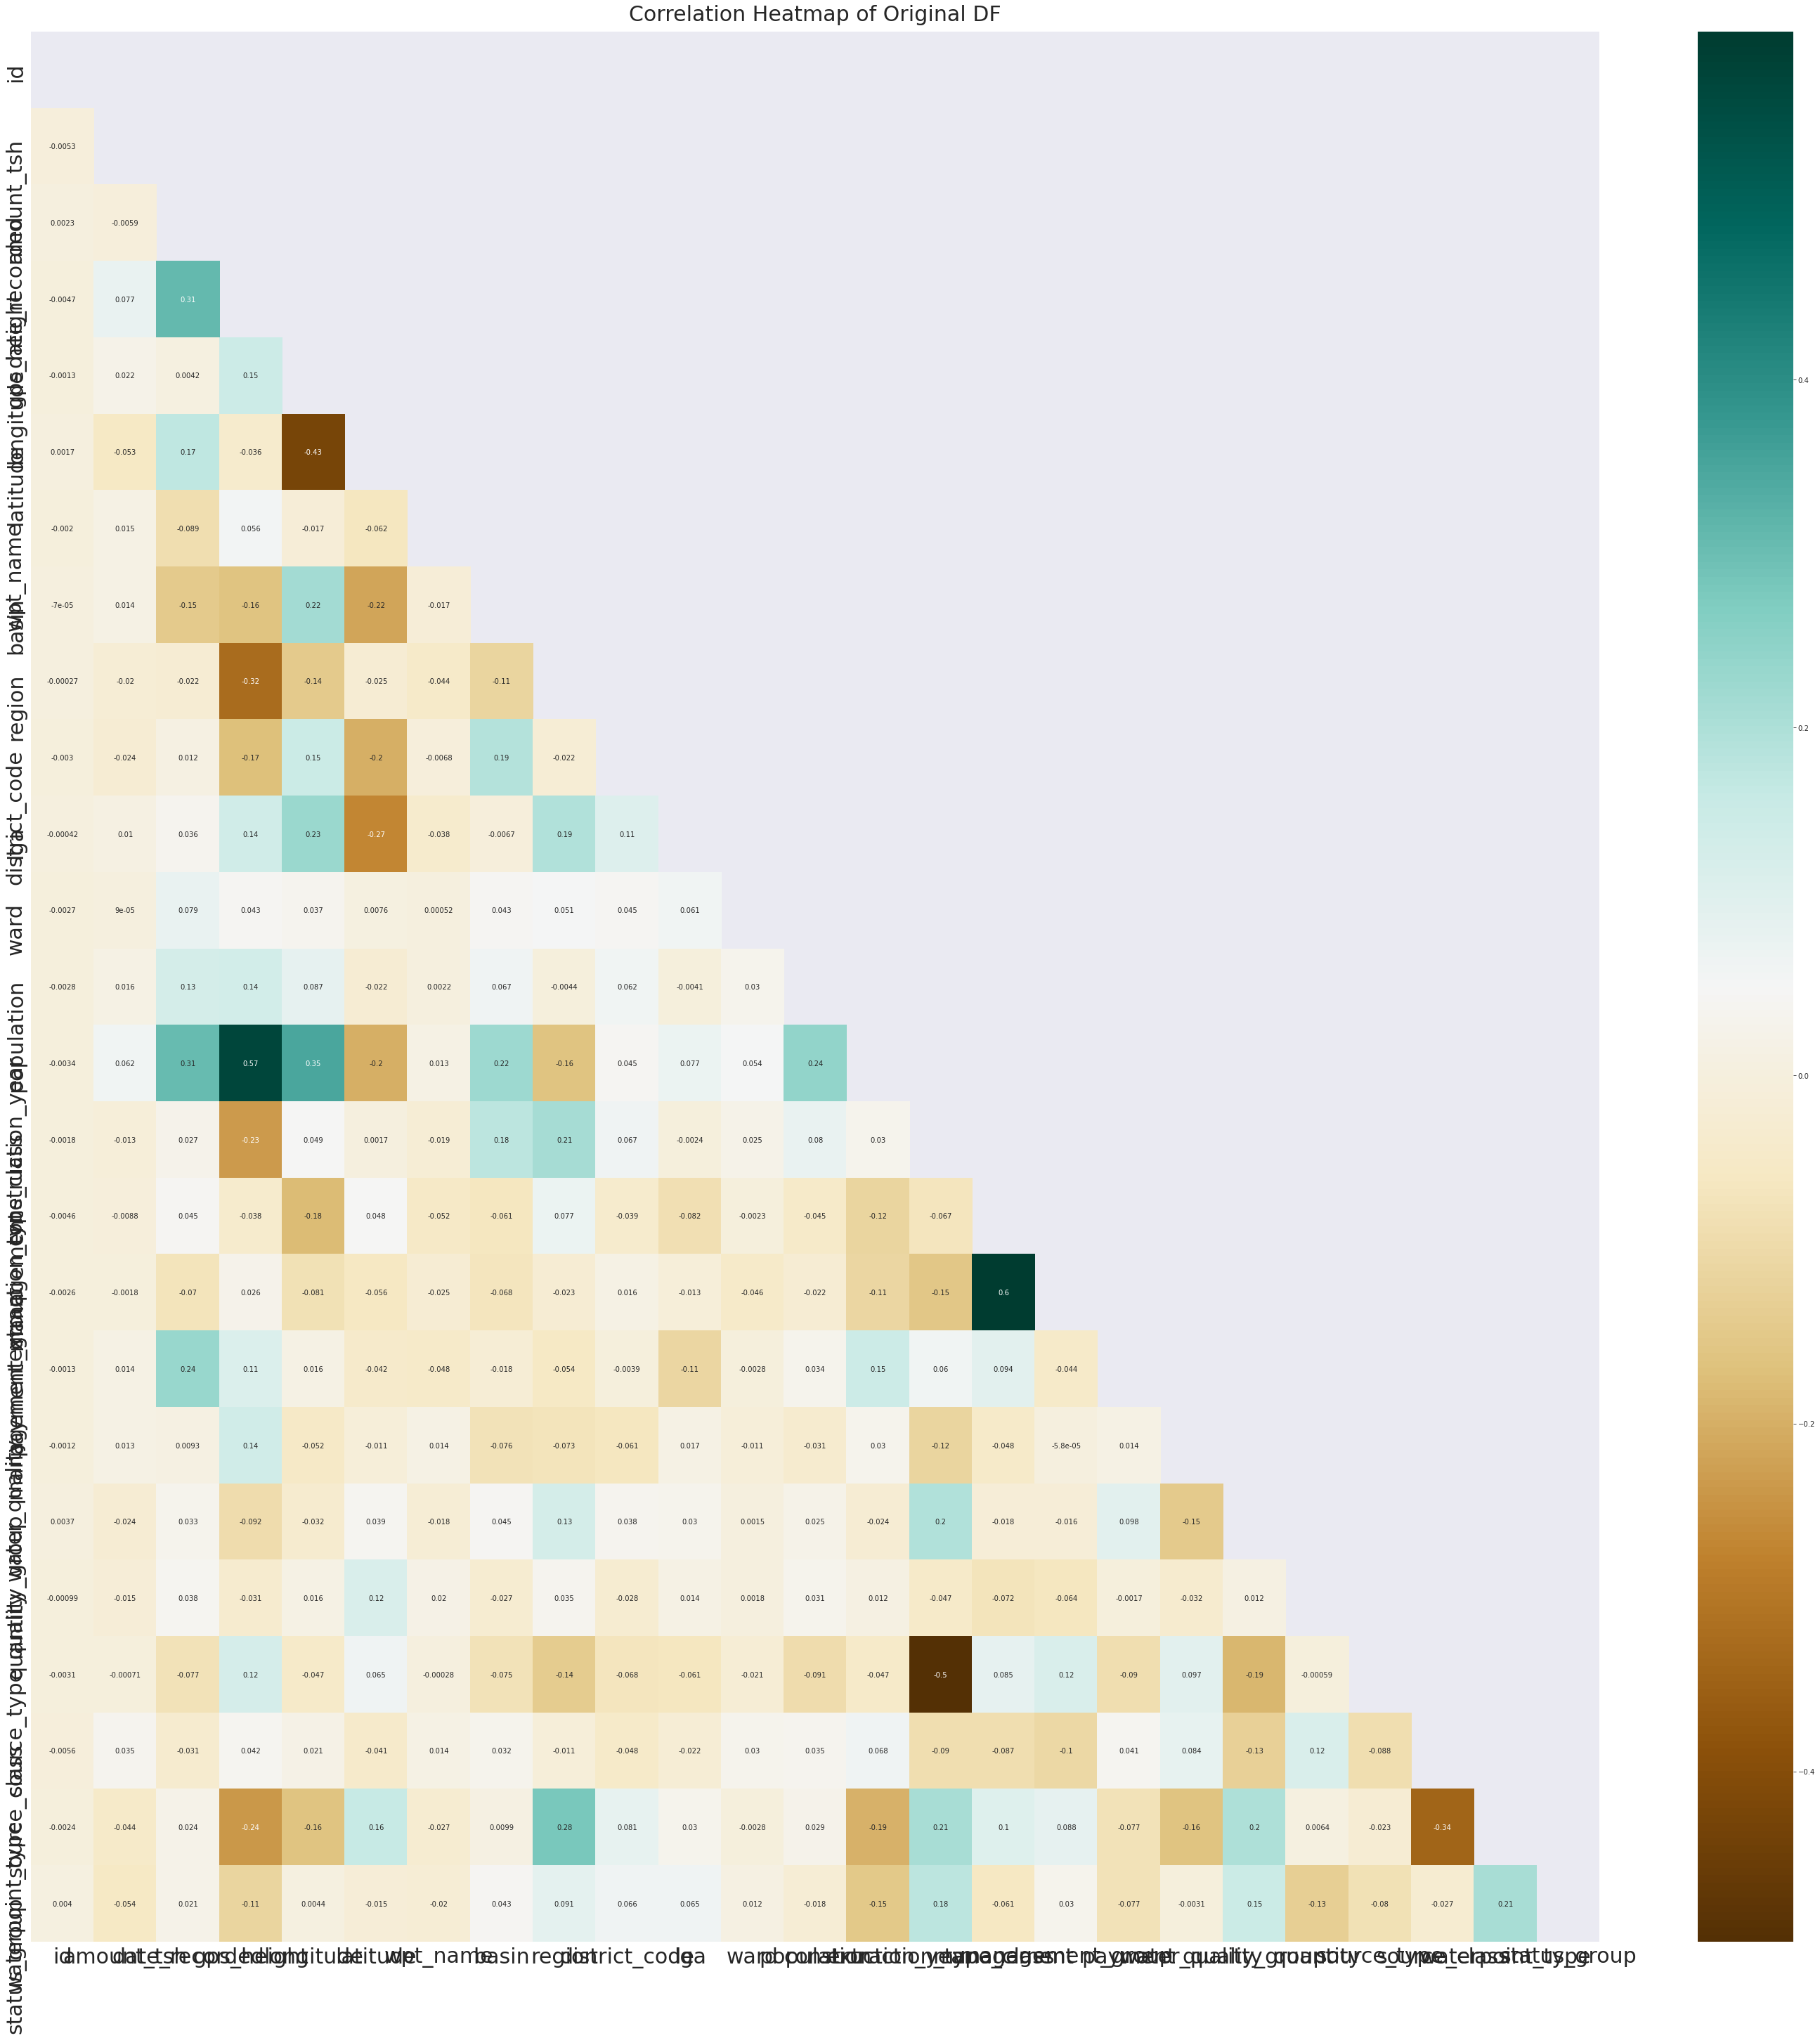

In [239]:
with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(50,50))
    
    mask = np.triu(np.ones_like(df_tr.corr(), dtype=np.bool))
    
    heatmap = sns.heatmap(df_tr.corr(), annot=True, mask=mask, cmap='BrBG');
    
    plt.xticks(fontsize = 30)
    
    plt.yticks(fontsize = 30)
    
    heatmap.set_title('Correlation Heatmap of Original DF', fontdict={'fontsize':30}, pad=16);

In [240]:
df_tr_corr = df_tr.corr()["status_group"].map(abs).sort_values(ascending = False)
df_tr_corr

status_group            1.00
waterpoint_type         0.21
extraction_type_class   0.18
quality_group           0.15
construction_year       0.15
quantity                0.13
gps_height              0.11
region                  0.09
source_type             0.08
payment                 0.08
district_code           0.07
lga                     0.07
management              0.06
amount_tsh              0.05
basin                   0.04
management_group        0.03
source_class            0.03
date_recorded           0.02
wpt_name                0.02
population              0.02
latitude                0.01
ward                    0.01
longitude               0.00
id                      0.00
water_quality           0.00
Name: status_group, dtype: float64

In [ ]:
df_tr.isna().sum()

In [ ]:
df_tr.head()

In [ ]:
df_tr.dropna(inplace = True)

In [ ]:
df_tr.info()

In [ ]:
df_tr.isna().sum()

In [ ]:
with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(40,40))
    
    mask = np.triu(np.ones_like(df_tr.corr(), dtype=np.bool))
    
    heatmap = sns.heatmap(df_tr.corr(), annot=True, mask=mask, cmap='BrBG');
    
    plt.xticks(fontsize = 30)
    
    plt.yticks(fontsize = 30)
    
    heatmap.set_title('Correlation Heatmap of Original DF', fontdict={'fontsize':30}, pad=16);

In [ ]:
df_tr_corr = df_tr.corr()["status_group"].map(abs).sort_values(ascending = False)
df_tr_corr

In [ ]:
df_top_corr = df_tr[["status_group", "waterpoint_type", "extraction_type_class", "construction_year", "gps_height", "quantity", "quality_group", "payment", "source_type"]].copy()

In [ ]:
df_top_corr

In [ ]:
with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(50, 50))
    
    mask = np.triu(np.ones_like(df_top_corr.corr(), dtype=np.bool))
    
    heatmap = sns.heatmap(df_top_corr.corr(), annot=True, mask=mask, cmap='BrBG', annot_kws={'size': 60});
    
    plt.xticks(fontsize = 40, rotation = 45)
    
    plt.yticks(fontsize = 40, rotation = 45)
    
    heatmap.set_title('Correlation Heatmap of Original DF', fontdict={'fontsize':50}, pad=16);

In [ ]:
df_top_corr_matrix = df_top_corr.corr()["status_group"].map(abs).sort_values(ascending = False)
df_top_corr_matrix

In [ ]:
df_top_corr